###  Hind Ali 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Election Preferences.csv')
df.head(10)

,Voter ID,Tax Bracket,Gender,Previous Elections,Preferred Candidate,2015 Income,Age
0,10023,13600,1,0,Trump,16186,24
1,10024,51800,0,2,Hilary,87200,35
2,10025,87500,0,2,Hilary,100682,38
3,10026,156000,1,3,Trump,221175,40
4,10027,51800,0,0,Trump,62122,19
5,10028,87500,0,0,Trump,149979,28
6,10029,51800,0,2,Hilary,84880,40
7,10030,87500,1,2,Hilary,90944,40
8,10031,13600,0,0,Trump,15856,24
9,10032,13600,1,0,Trump,20503,26


### 2-Fit the model using the …. Decision Tree Classifier in SciKit Learn 
a. Using Entropy/ Information Gain 
b. Using Gini Impurity 

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [3]:
decision_tree = DecisionTreeClassifier(max_depth=3, criterion='entropy')

In [4]:
df.columns

Index(['Voter ID', 'Tax Bracket', 'Gender', 'Previous Elections',
       'Preferred Candidate', '2015 Income', 'Age '],
      dtype='object')

In [5]:
X= df.drop(['Voter ID','2015 Income','Preferred Candidate','Age '],axis=1)
Y=df['Preferred Candidate']


In [6]:
dt = decision_tree.fit(X,Y)

In [7]:
fn = ['Tax Bracket', 'Gender', 'Previous Elections']

In [8]:
target_name = ['Trump', 'Hilary' ]

In [9]:
dot_data = export_graphviz(dt, out_file='dt.dot', class_names=target_name, feature_names=fn, filled = True)

In [10]:
!dot -Tpng dt.dot -o dt.png -Gdpi=600


(process:30308): GLib-GIO-WARNING **: 11:09:54.610: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2303.17.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:30308): GLib-GIO-WARNING **: 11:09:54.612: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


In [11]:
from IPython.display import Image

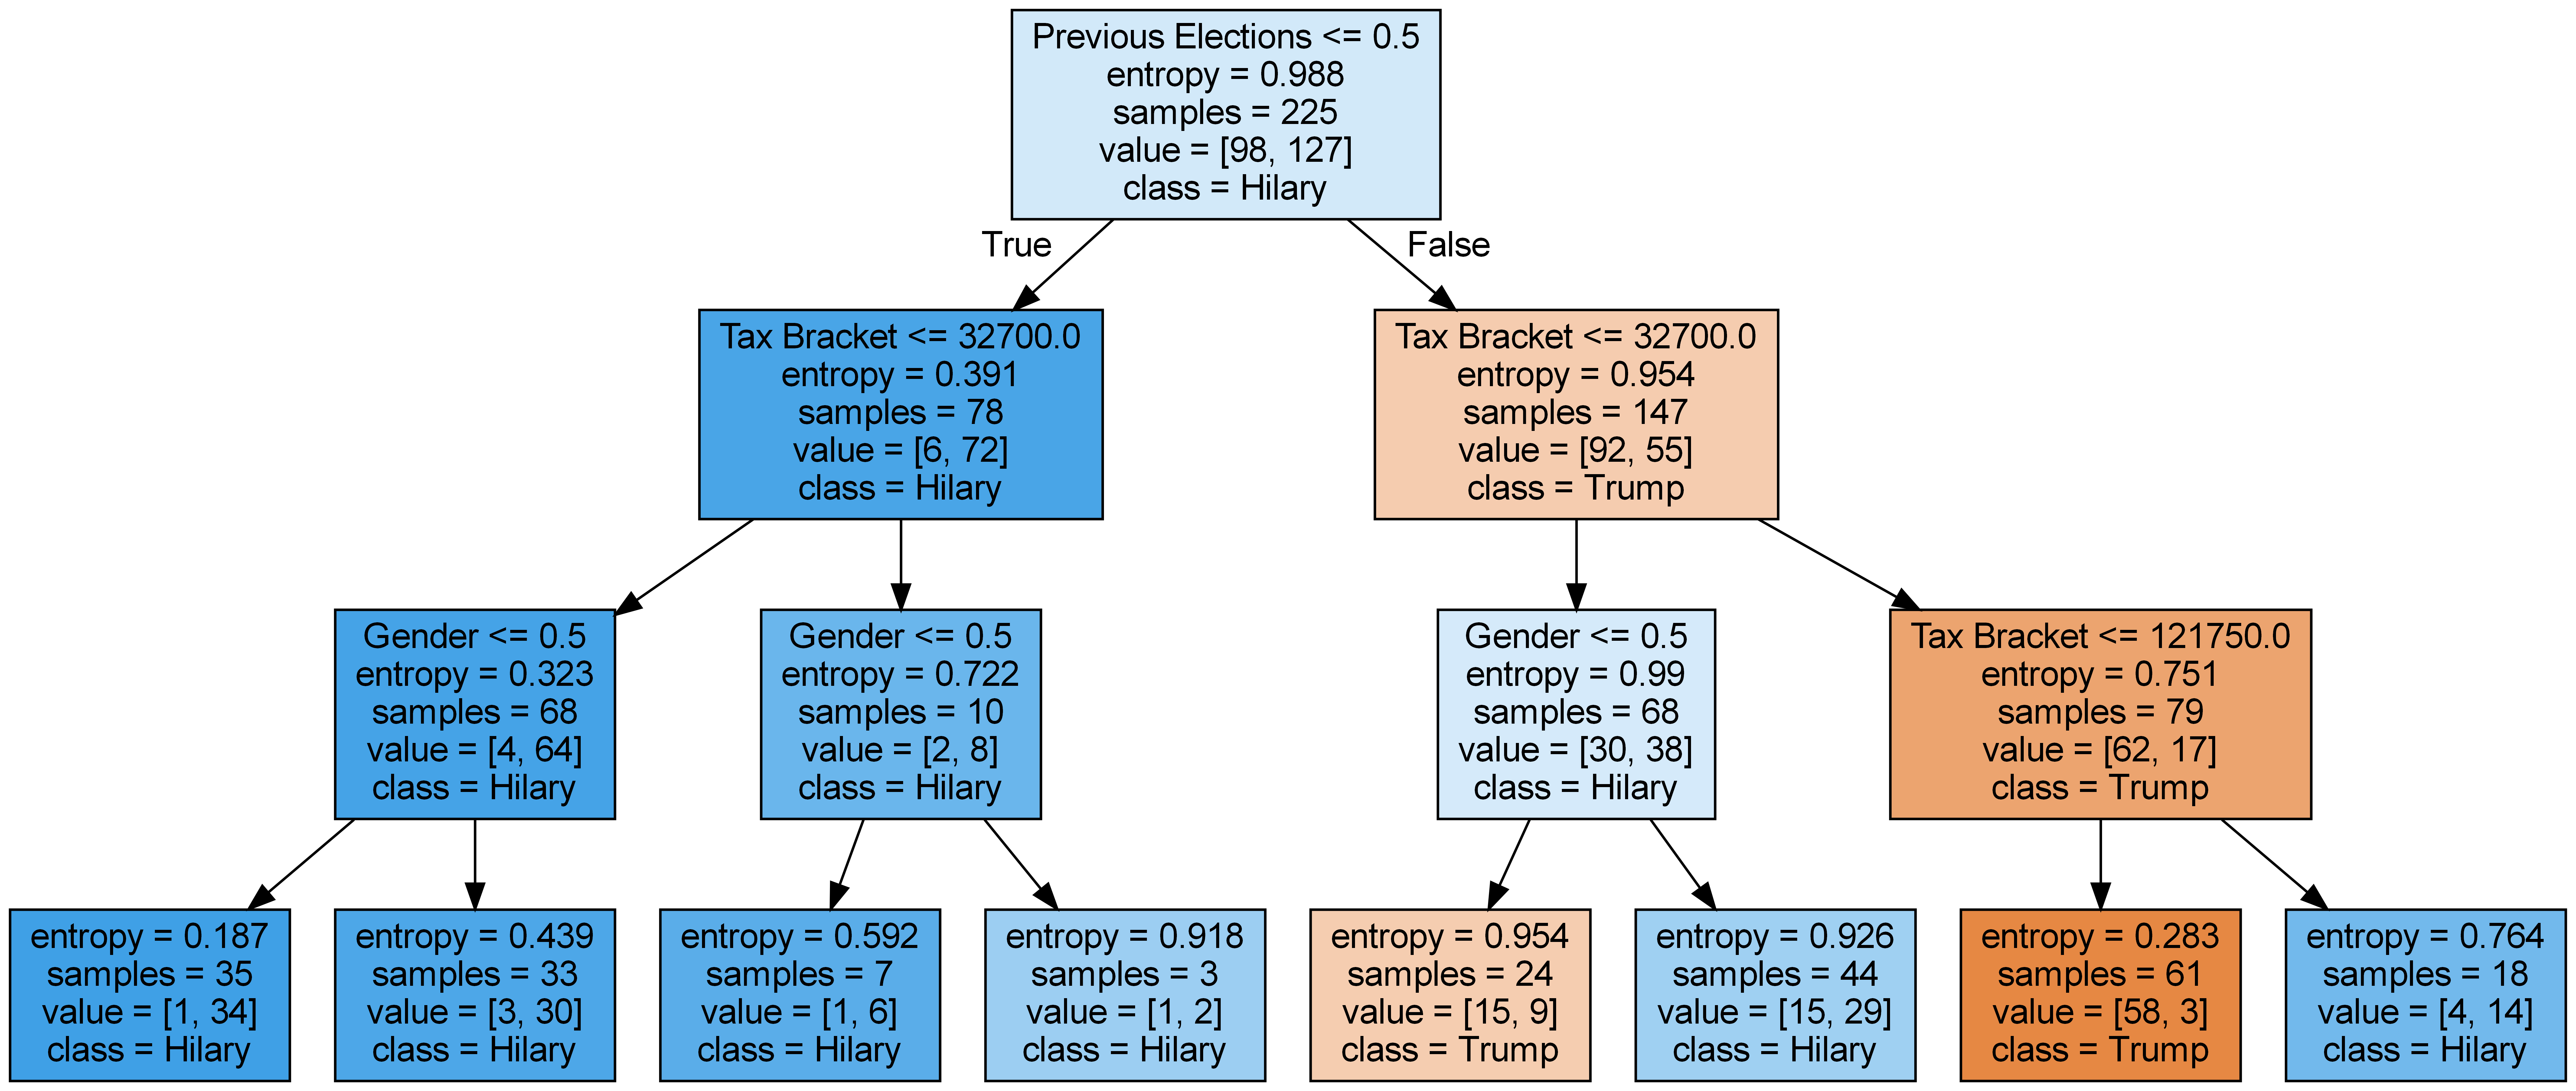

In [12]:
Image(filename = 'dt.png')

In [13]:
decision_tree = DecisionTreeClassifier(max_depth=3, criterion='gini')

In [14]:
dt = decision_tree.fit(X,Y)

In [15]:
dot_data = export_graphviz(dt, out_file='dt.dot', class_names=target_name, feature_names=fn, filled = True)

In [16]:
from IPython.display import Image

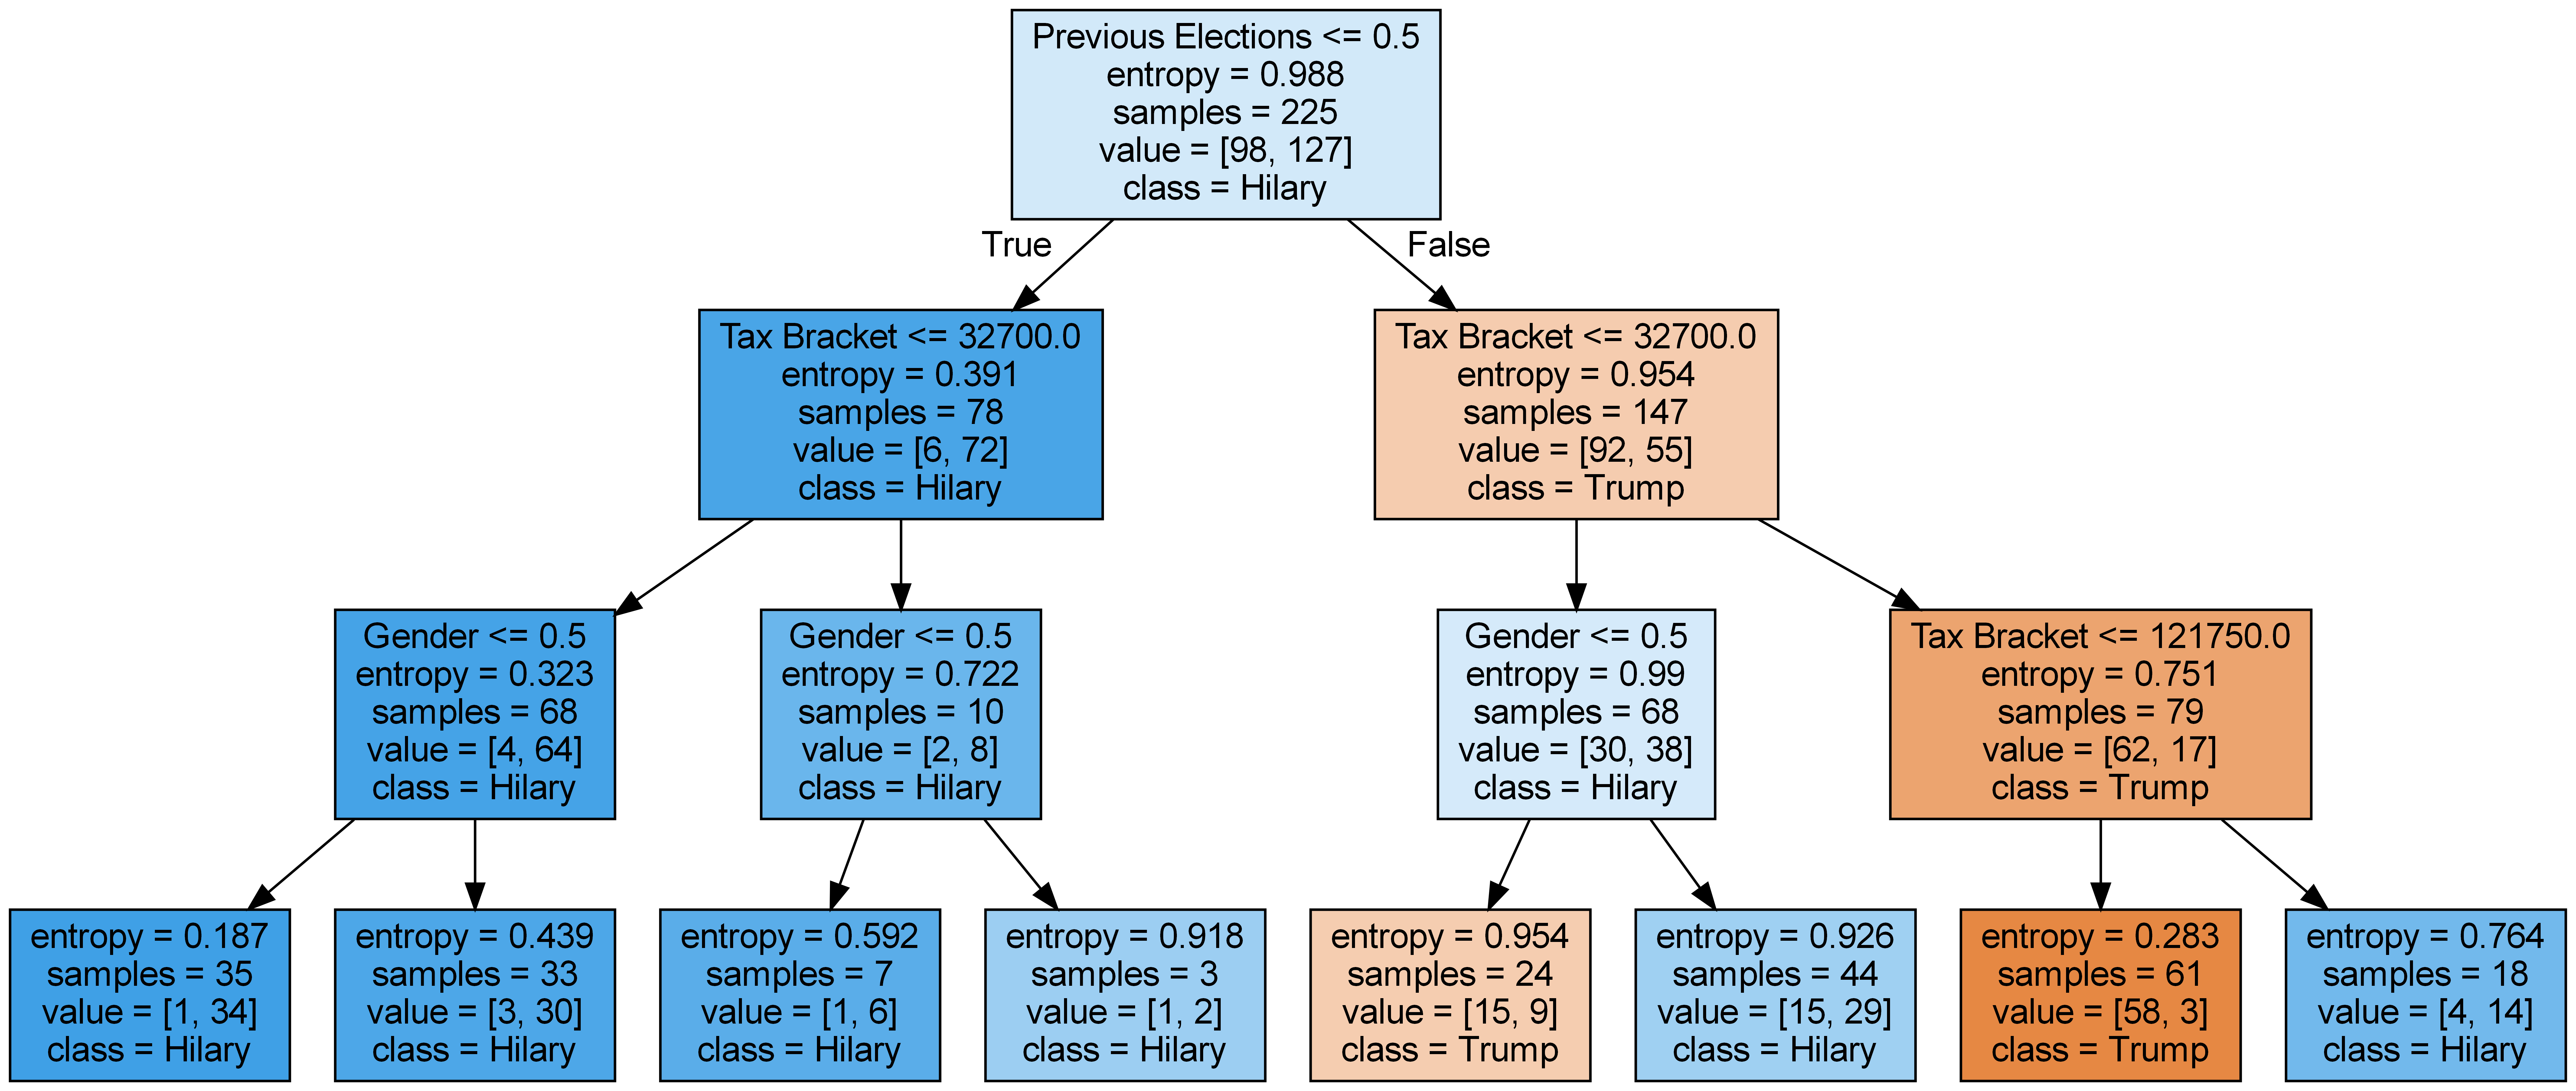

In [17]:
Image(filename = 'dt.png')

## 3.Using either method, experiment with max_depth and comment on what you think is the optimal depth for this model 

In [18]:
decision_tree = DecisionTreeClassifier(max_depth=5, criterion='entropy')

In [19]:
dot_data = export_graphviz(dt, out_file='dt.dot', class_names=target_name, feature_names=fn, filled = True)

In [20]:
!dot -Tpng dt.dot -o dt.png -Gdpi=600

In [21]:
from IPython.display import Image

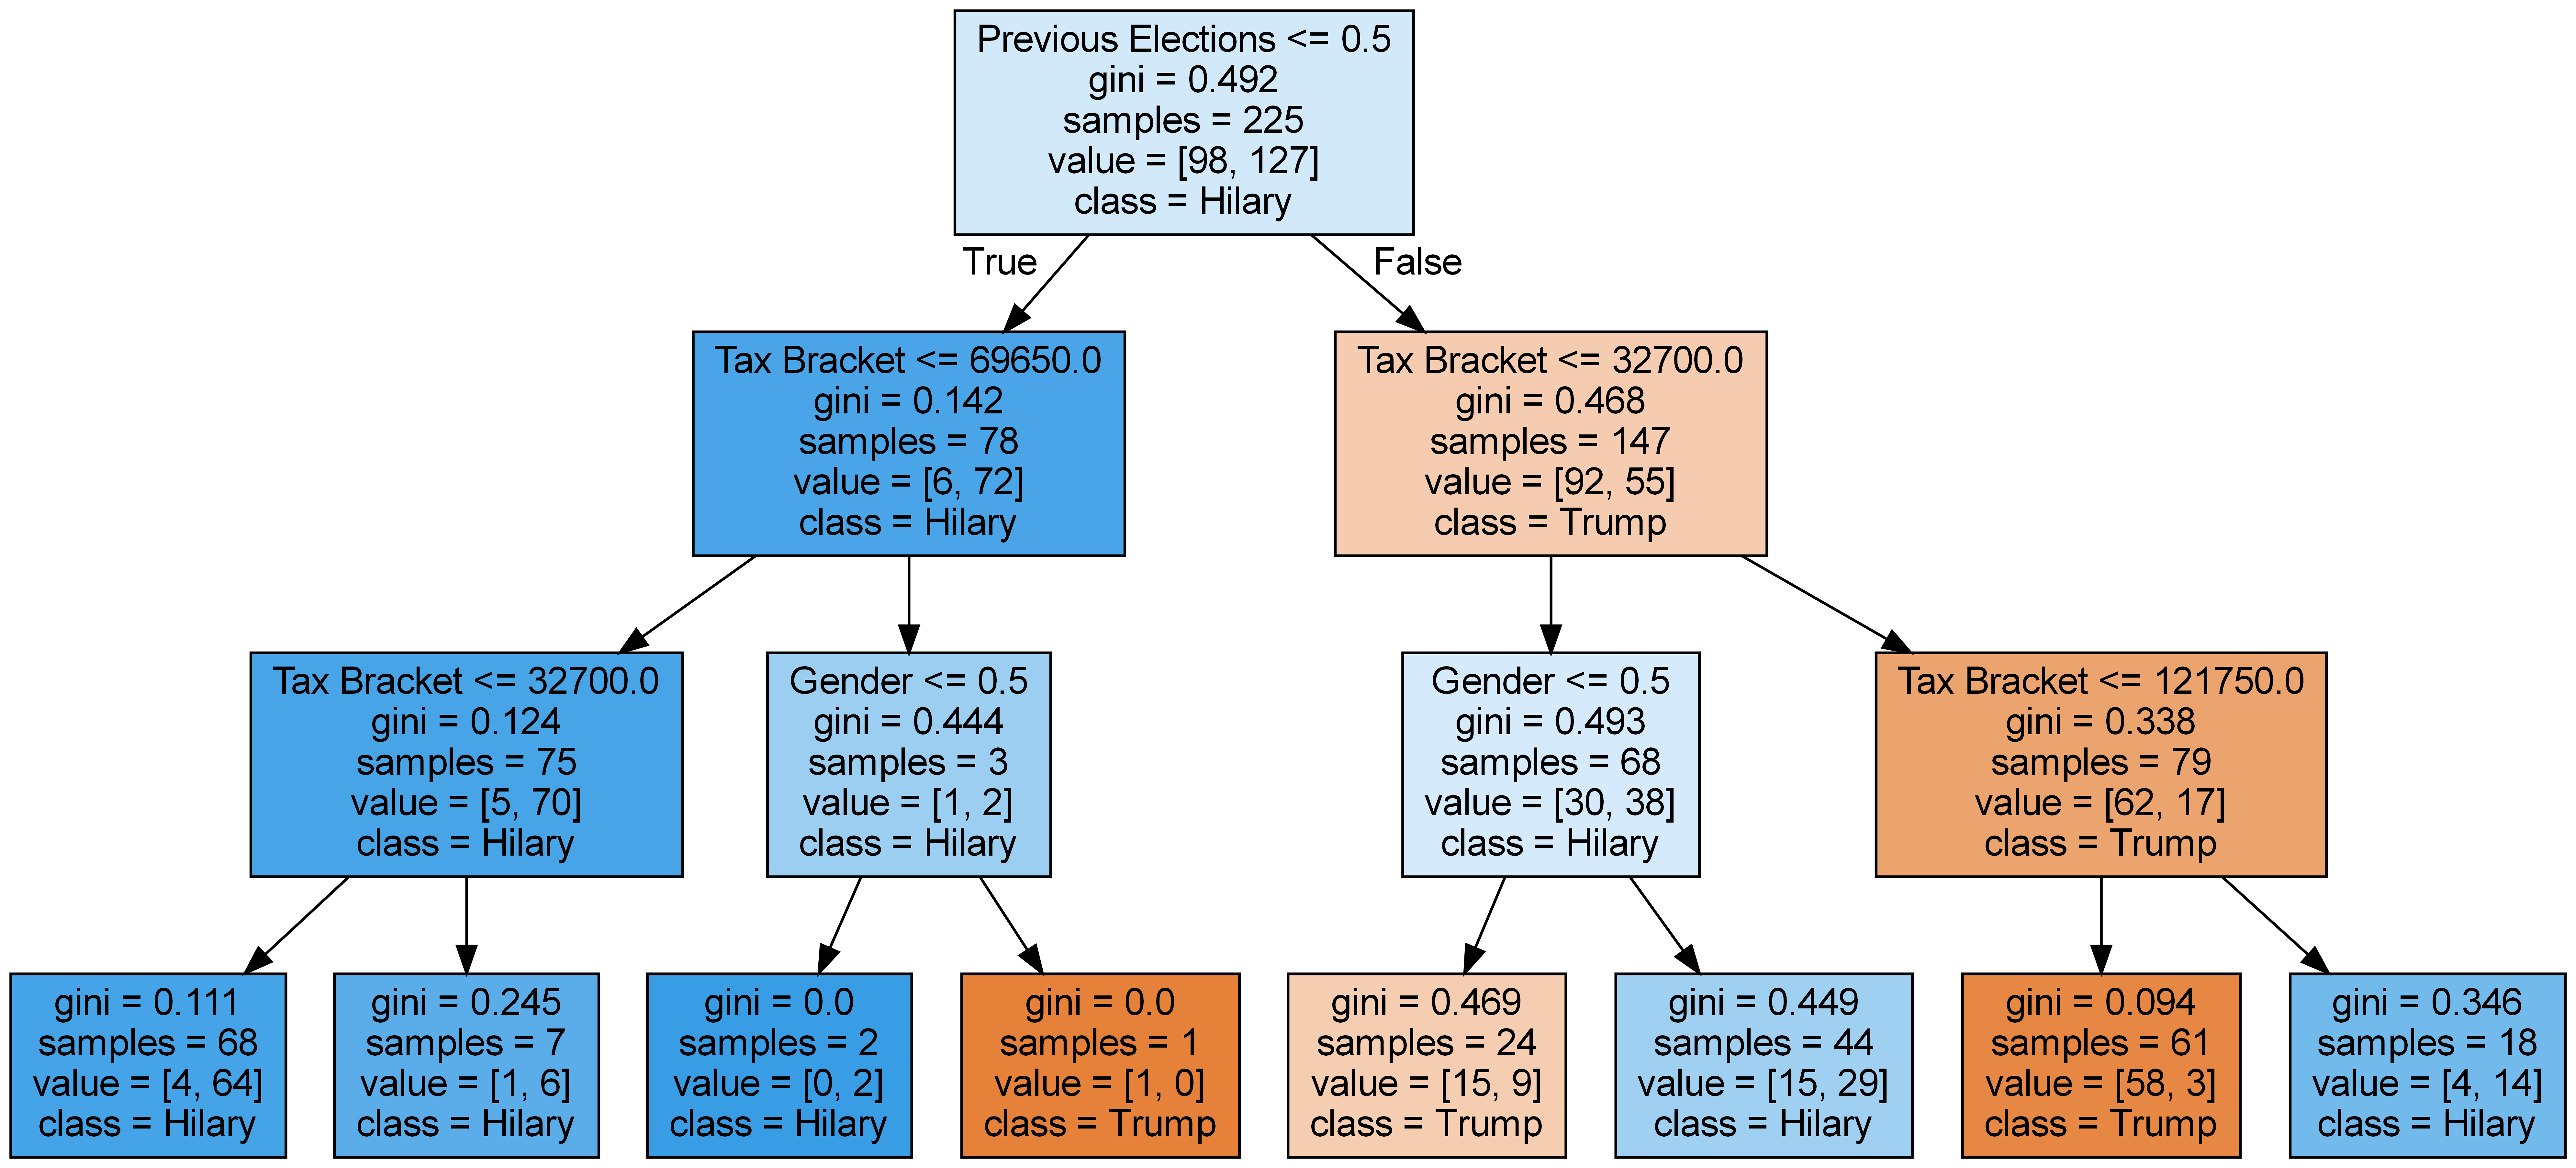

In [22]:
Image(filename = 'dt.png')

## 5.Use Matplotlib to chart the '2015 Income' with another feature of your choosing.  Are you able to make out any clear segments? 

In [23]:
df.groupby(["Preferred Candidate","2015 Income"])["2015 Income"].count()

Preferred Candidate  2015 Income
Hilary               17048          1
                     17814          1
                     20918          1
                     21122          1
                     21346          1
                                   ..
Trump                221175         1
                     223626         1
                     226008         1
                     233641         1
                     235288         1
Name: 2015 Income, Length: 224, dtype: int64

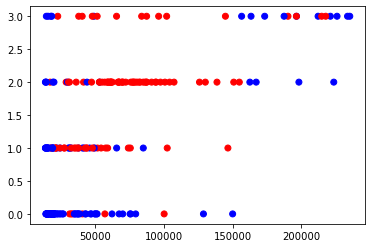

In [24]:
fig, ax = plt.subplots()

colors = {'Trump':'blue', 'Hilary':'red'}
ax.scatter(df['2015 Income'], df['Previous Elections'], c=df['Preferred Candidate'].map(colors))

plt.show()